In [142]:
import numpy as np
import pickle
import gzip
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [143]:
def load_data():
    f = gzip.open('/Users/saurabhgiri/Downloads/mnists.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f,encoding='bytes')
    f.close()
    return (training_data, validation_data, test_data)

# Load raw data tuples: ((x_train, y_train), (x_val, y_val), (x_test, y_test))
data=load_data()
raw_training_data=data[0][0]
target_training_data=data[0][1]
test_data=data[2][0]
target_test_data=data[2][1]

raw_training_data = torch.tensor(raw_training_data, dtype=torch.float32)
target_training_data = torch.tensor(target_training_data, dtype=torch.long)
test_data = torch.tensor(test_data, dtype=torch.float32)
target_test_data = torch.tensor(target_test_data, dtype=torch.long)



train_dataset = TensorDataset(raw_training_data, target_training_data)
test_dataset = TensorDataset(test_data, target_test_data)



train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 512), # Input is 784 features (28*28)
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)   # Output is 10 classes
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = MLP()

Loading data from /Users/saurabhgiri/Downloads/mnists.pkl.gz...


In [144]:
learning_rate = 0.01 
epochs = 10


loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


print("\nStarting Training on Local Data...")

for epoch in range(epochs):
    model.train() 
    running_loss = 0.0
    
    for batch_idx, (X, y) in enumerate(train_loader):

        pred = model(X)
        

        loss = loss_fn(pred, y)
        

        optimizer.zero_grad() 
        loss.backward()      
        optimizer.step()     
        
        running_loss += loss.item()
        

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")


Starting Training on Local Data...
Epoch 0, Loss: 1.7778
Epoch 1, Loss: 0.6102
Epoch 2, Loss: 0.4166
Epoch 3, Loss: 0.3586
Epoch 4, Loss: 0.3265
Epoch 5, Loss: 0.3029
Epoch 6, Loss: 0.2838
Epoch 7, Loss: 0.2671
Epoch 8, Loss: 0.2523
Epoch 9, Loss: 0.2394


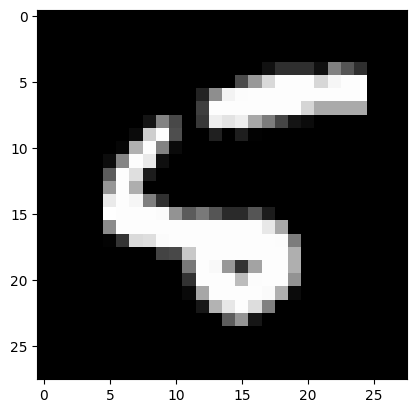

5


In [145]:
index=8
plt.imshow(test_data[index].reshape(28,28),cmap='grey')
plt.show()
print(target_test_data[index].item())

In [146]:
input=test_data[8].unsqueeze(0)

In [147]:
model.eval()
with torch.inference_mode():
    print(torch.argmax(model(input)).item())

6


In [151]:
model.eval()
accuracy=0.0
error_indices=[]
with torch.inference_mode():
    test_data_pred=model(test_data)
    for i in range(len(test_data_pred)):
        if torch.argmax(test_data_pred[i])==target_test_data[i]:
            accuracy+=1
        else:
            error_indices.append((i,torch.argmax(test_data_pred[i]),target_test_data[i]))
    print(f'{(accuracy/len(test_data))*100:.2f}')


93.32


In [139]:
# error_indices

In [141]:
# model.state_dict()